In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("Linear Regression.xlsx",sheet_name = 0)

In [3]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
price          21613 non-null int64
sqft_living    21613 non-null int64
bedrooms       21613 non-null int64
bathrooms      21613 non-null float64
floors         21613 non-null float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [5]:
data.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


# EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE26E0AD88>,
      dtype=object)

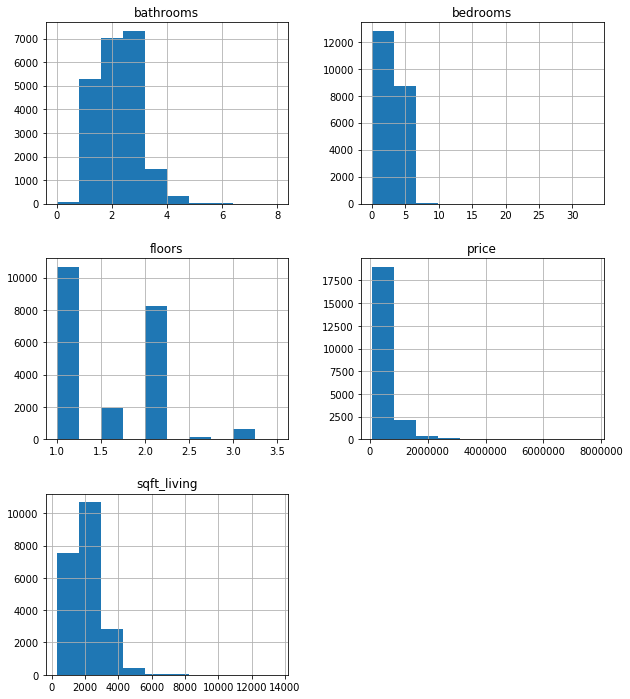

In [6]:
data.hist(figsize = (10,12))

In [7]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


# Model-1(Linear Regression for Price and sqft_living)

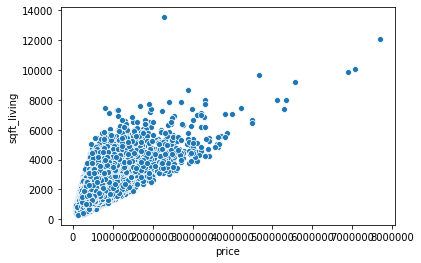

In [8]:
sns.scatterplot(data['price'],data['sqft_living'])

In [9]:
data1 = data[["price","sqft_living"]]
data1.head()

,price,sqft_living
0,221900,1180
1,538000,2570
2,180000,770
3,604000,1960
4,510000,1680


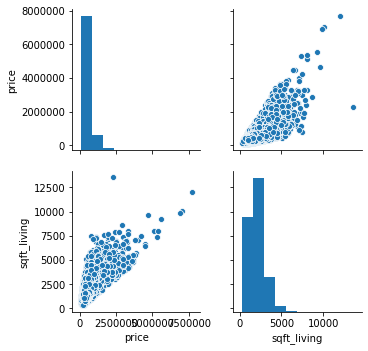

In [10]:
sns.pairplot(data1)

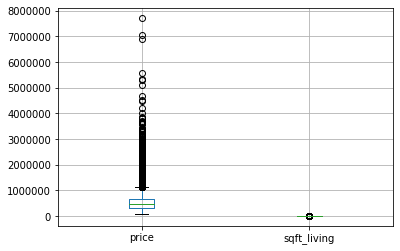

In [11]:
data1.boxplot()

In [12]:
x=data1.iloc[:,1:]
y=data1.iloc[:,:1]
x.head(1)

,sqft_living
0,1180


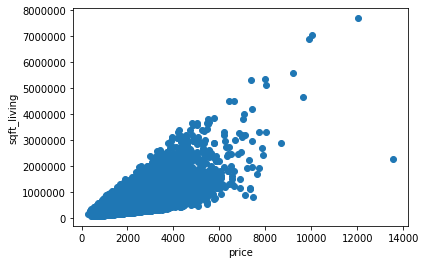

In [13]:
plt.scatter(x, y)
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.show()

__Splitting the records for training and testing__

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [15]:
data1.shape

(21613, 2)

In [16]:
X_train.shape

(17290, 1)

In [17]:
y_train.shape

(17290, 1)

In [18]:
X_test.shape

(4323, 1)

In [19]:
y_test.shape

(4323, 1)

__model building__

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

__training the model__

In [21]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
lin_reg.coef_

array([[280.67382569]])

In [23]:
lin_reg.intercept_

array([-42568.70358496])

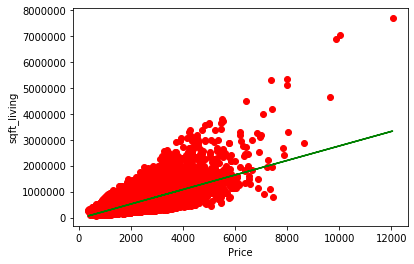

In [24]:
# visualising training set result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'green')
plt.xlabel('Price')
plt.ylabel('sqft_living')
plt.show()

__testing model__

In [25]:
ypred=lin_reg.predict(X_test)
ypred

array([[633855.21632509],
       [566493.49815977],
       [364408.34366382],
       ...,
       [701216.9344904 ],
       [187583.83347987],
       [465450.9209118 ]])

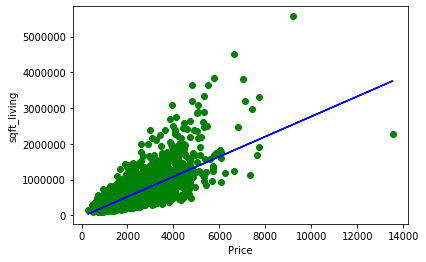

In [26]:
# Visualise Test set result
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,lin_reg.predict(X_test), color = 'blue')
plt.xlabel('Price')
plt.ylabel('sqft_living')
plt.show()

__price estimation__

In [27]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.5031163723285275
The RMSE value is........ 263380.00189817196


__estimation for unseen data__

In [28]:
unseen_pred=lin_reg.predict(np.array([[1180]]))
print('The unseen for the given x is....',unseen_pred)

The unseen for the given x is.... [[288626.41072784]]


# Model-2(Linear Regression for Price and bedrooms)

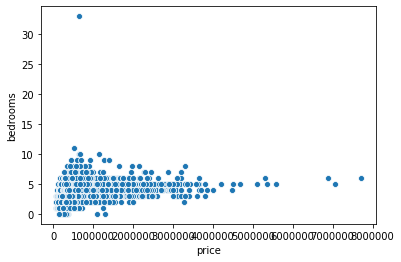

In [44]:
sns.scatterplot(data['price'],data['bedrooms'])

In [29]:
data1 = data[["price","bedrooms"]]
data1.head()

,price,bedrooms
0,221900,3
1,538000,3
2,180000,2
3,604000,4
4,510000,3


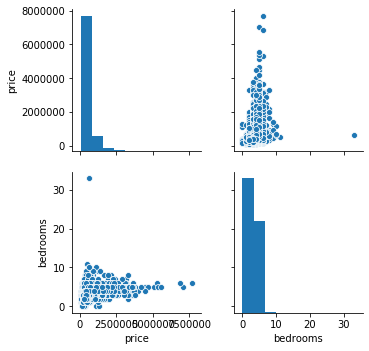

In [30]:
sns.pairplot(data1)

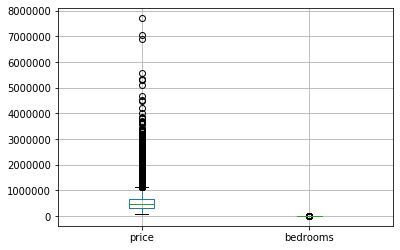

In [31]:
data1.boxplot()

In [32]:
x=data1.iloc[:,1:]
y=data1.iloc[:,:1]
x.head(1)

,bedrooms
0,3


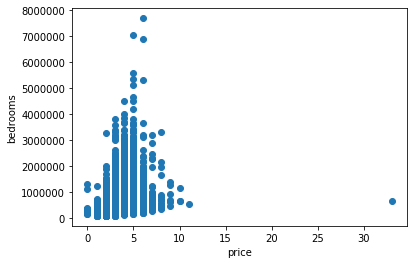

In [33]:
plt.scatter(x, y)
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.show()

__splitting the records for training and testing__

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

__model building__

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

__training model__

In [36]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
lin_reg.coef_

array([[118660.62797869]])

In [38]:
lin_reg.intercept_

array([139952.87593386])

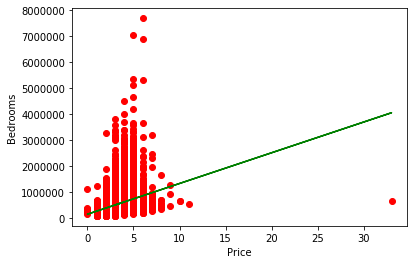

In [39]:
 #Visualise Training set result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'green')
plt.xlabel('Price')
plt.ylabel('Bedrooms')
plt.show()


__testing model__

In [40]:
ypred=lin_reg.predict(X_test)
ypred

array([[614595.3878486 ],
       [495934.75986992],
       [377274.13189123],
       ...,
       [614595.3878486 ],
       [377274.13189123],
       [614595.3878486 ]])

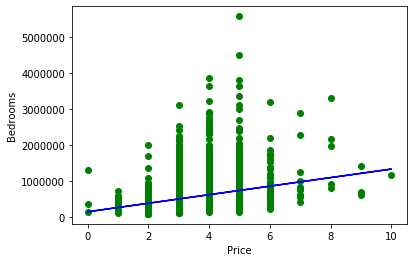

In [41]:
# Visualise Test set result
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,lin_reg.predict(X_test), color = 'blue')
plt.xlabel('Price')
plt.ylabel('Bedrooms')
plt.show()


__price estimation__

In [42]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.10886345250291585
The RMSE value is........ 352717.9654187645


__estimation for unseen data__

In [43]:
unseen_pred = lin_reg.predict(np.array([[3]]))
print("The unseen for the given x is....",unseen_pred)

The unseen for the given x is.... [[495934.75986992]]


# Model-3(Linear Regression for Price and bathrooms)

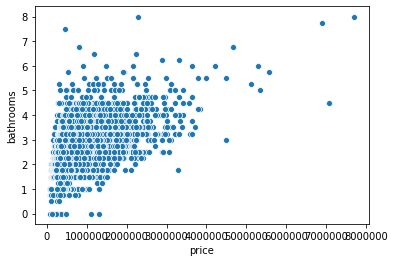

In [45]:
sns.scatterplot(data['price'],data['bathrooms'])

In [46]:
data1 = data[["price","bathrooms"]]
data1.head()

,price,bathrooms
0,221900,1.00
1,538000,2.25
2,180000,1.00
3,604000,3.00
4,510000,2.00


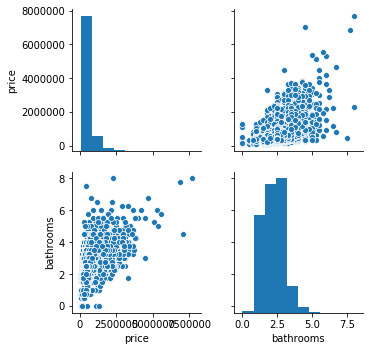

In [47]:
sns.pairplot(data1)

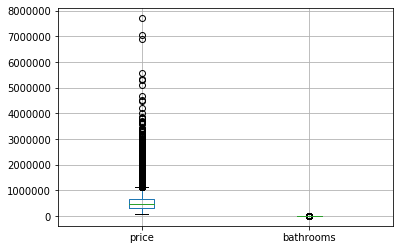

In [48]:
data1.boxplot()

In [49]:
x=data1.iloc[:,1:]
y=data1.iloc[:,:1]
x.head(1)

,bathrooms
0,1.0


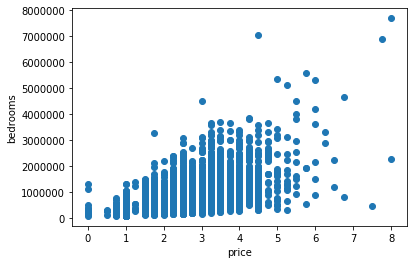

In [50]:
plt.scatter(x, y)
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.show()

__splitting the records for training and testing__

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

__model building__

In [53]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

__training model__

In [54]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
lin_reg.coef_

array([[249143.95803858]])

In [56]:
lin_reg.intercept_

array([13073.99575289])

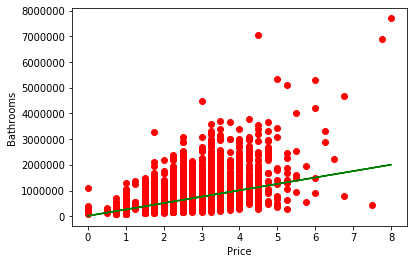

In [57]:
 #Visualise Training set result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'green')
plt.xlabel('Price')
plt.ylabel('Bathrooms')
plt.show()

__testing model__

In [58]:
ypred=lin_reg.predict(X_test)
ypred

array([[573647.90133969],
       [386789.93281076],
       [262217.95379147],
       ...,
       [635933.89084934],
       [262217.95379147],
       [698219.88035898]])

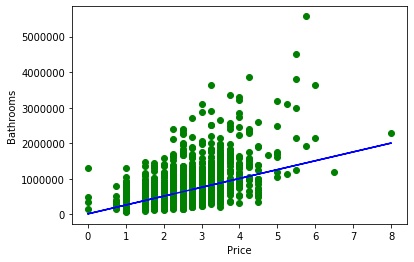

In [59]:
# Visualise Test set result
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,lin_reg.predict(X_test), color = 'blue')
plt.xlabel('Price')
plt.ylabel('Bathrooms')
plt.show()

__price estimation__

In [60]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.28122887124177365
The RMSE value is........ 316774.90190998075


__estimation for unseen data__

In [61]:
unseen_pred = lin_reg.predict(np.array([[2]]))
print("The unseen for the given x is....",unseen_pred)

The unseen for the given x is.... [[511361.91183005]]


# Model-4(Linear Regression for Price and floors)

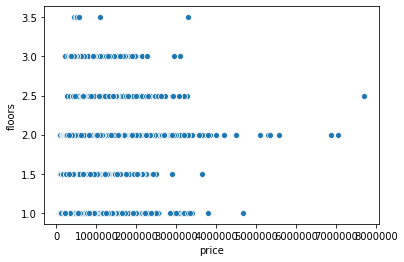

In [63]:
sns.scatterplot(data['price'],data['floors'])

In [64]:
data1 = data[["price","floors"]]
data1.head()

,price,floors
0,221900,1.0
1,538000,2.0
2,180000,1.0
3,604000,1.0
4,510000,1.0


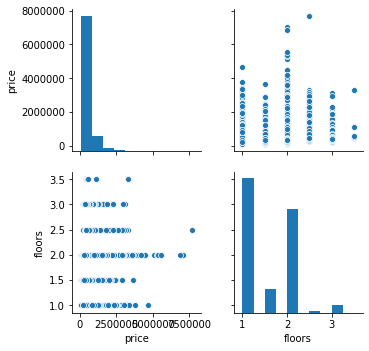

In [65]:
sns.pairplot(data1)

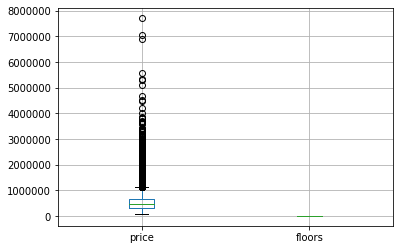

In [66]:
data1.boxplot()

In [67]:
x=data1.iloc[:,1:]
y=data1.iloc[:,:1]
x.head(1)

,floors
0,1.0


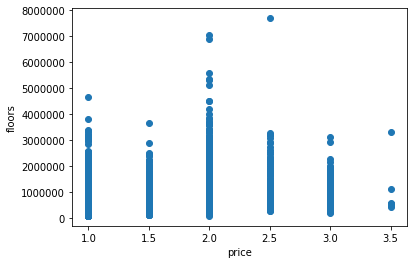

In [69]:
plt.scatter(x, y)
plt.xlabel('price')
plt.ylabel('floors')
plt.show()

__splitting the records for training and testing__

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

__model building__

In [71]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

__training model__

In [72]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
lin_reg.coef_

array([[171376.44562902]])

In [74]:
lin_reg.intercept_

array([283309.93245028])

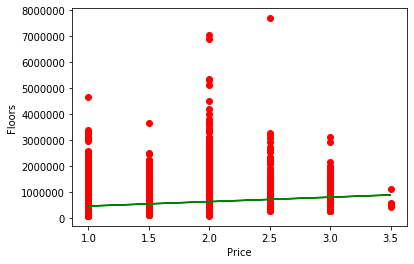

In [76]:
 #Visualise Training set result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'green')
plt.xlabel('Price')
plt.ylabel('Floors')
plt.show()

__testing model__

In [77]:
ypred=lin_reg.predict(X_test)
ypred

array([[540374.60089382],
       [454686.37807931],
       [454686.37807931],
       ...,
       [626062.82370833],
       [454686.37807931],
       [540374.60089382]])

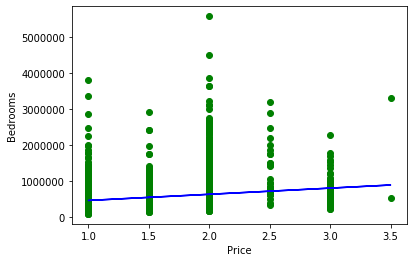

In [78]:
# Visualise Test set result
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,lin_reg.predict(X_test), color = 'blue')
plt.xlabel('Price')
plt.ylabel('Bedrooms')
plt.show()

__price estimation__

In [79]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.0733487976687478
The RMSE value is........ 359677.77234107786


__estimation for unseen data__

In [80]:
unseen_pred = lin_reg.predict(np.array([[2]]))
print("The unseen for the given x is....",unseen_pred)

The unseen for the given x is.... [[626062.82370833]]
